## Decision Tree classifier with postprunning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
dataset = load_iris()

In [4]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [6]:
## Convert into dependent and independent features

In [7]:
X = df

In [8]:
y = dataset.target

In [9]:
X,y

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0,

In [10]:
## Train test split
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.33,random_state=42)

In [12]:
## Implement decision tree
from sklearn.tree import DecisionTreeClassifier

In [13]:
## Post prunning
treeclassifier = DecisionTreeClassifier()

In [14]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
## How to see the decision tree
from sklearn import tree

[Text(0.5416666666666666, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 4.95\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[3] <= 1.35\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.35714285714285715, 'x[1] <= 2.25\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.4166666666666667, 0.21428571428571427, 'x[2] <= 4.5\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'

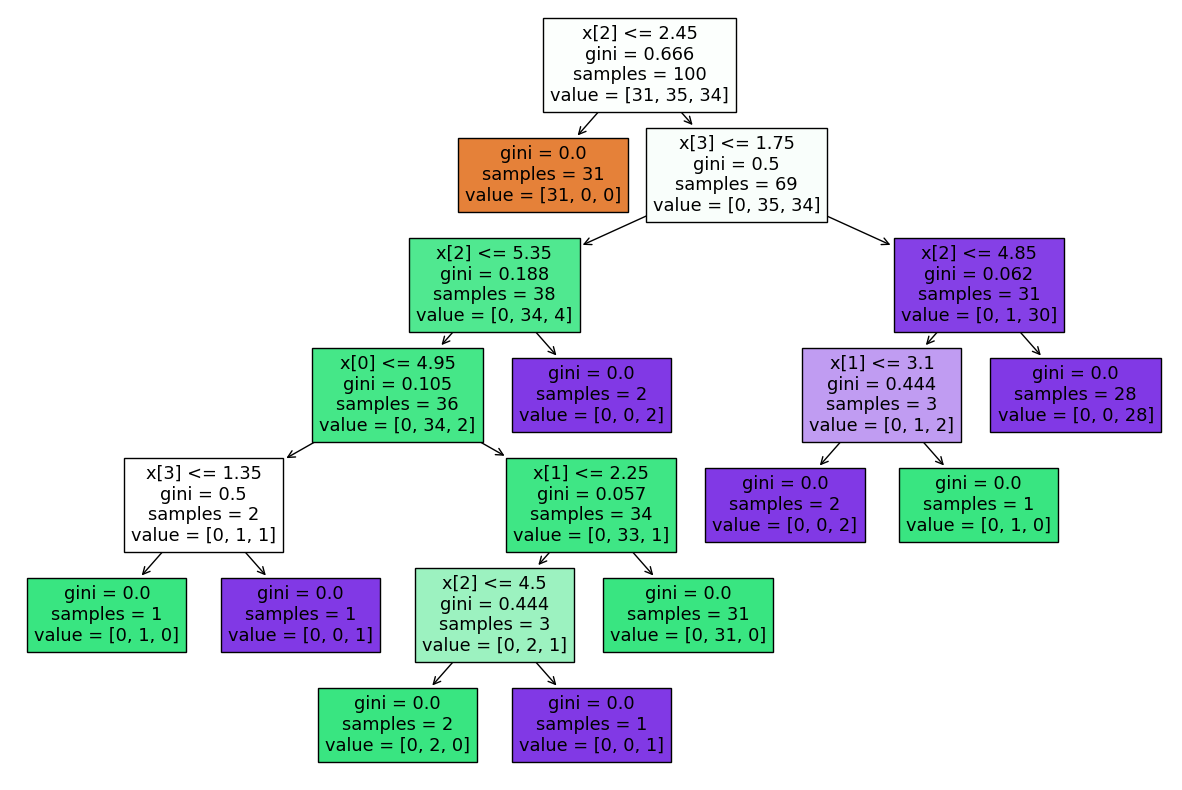

In [16]:
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [17]:
## Post prunning
treeclassifier = DecisionTreeClassifier(max_depth=2)

In [18]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

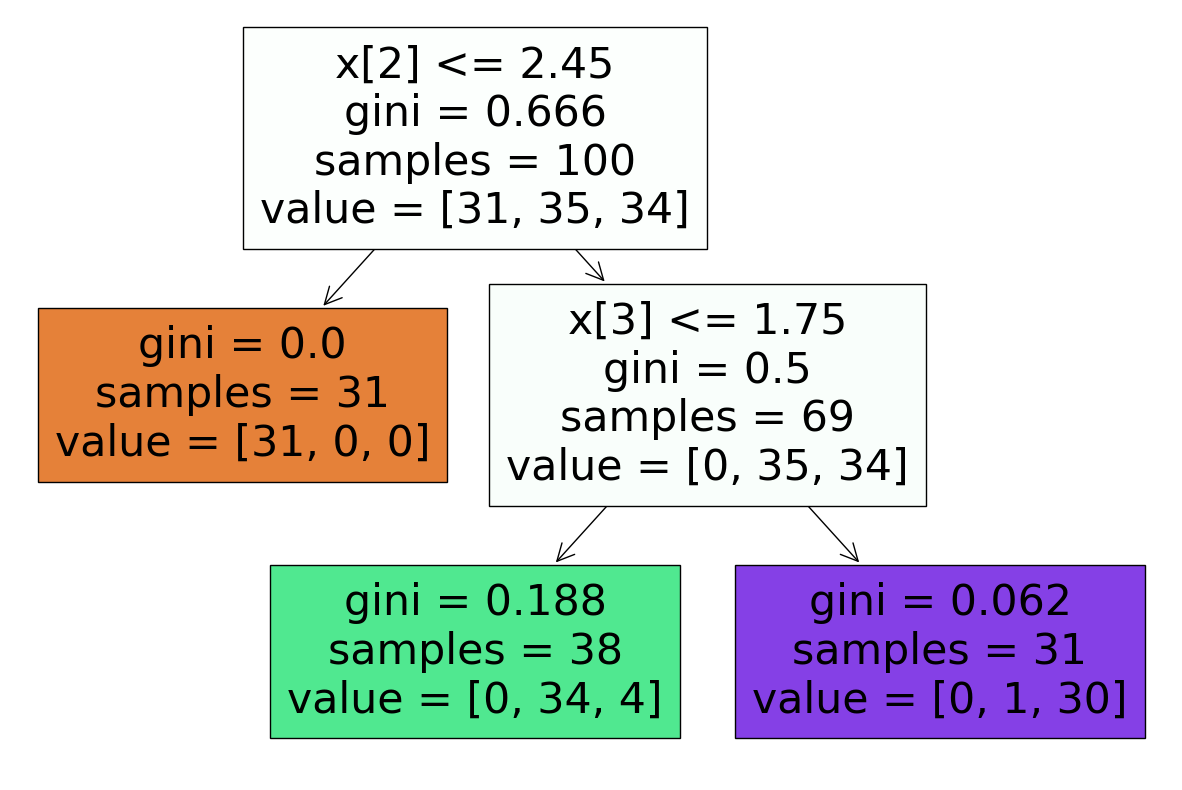

In [19]:
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [20]:
## prediction
y_pred = treeclassifier.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score,classification_report

In [22]:
accuracy_score(y_test,y_pred)

0.98

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [24]:
from sklearn.datasets import load_breast_cancer

In [25]:
dataset = load_breast_cancer()

In [26]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [27]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [28]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [29]:
X = pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [30]:
y = dataset.target

In [31]:
## Train Test split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.33)

In [33]:
## Descision tree classifier

In [34]:
tree_classifier = DecisionTreeClassifier(criterion='entropy')

In [35]:
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.625, 0.9375, 'x[7] <= 0.051\nentropy = 0.958\nsamples = 381\nvalue = [145, 236]'),
 Text(0.3611111111111111, 0.8125, 'x[20] <= 16.83\nentropy = 0.293\nsamples = 233\nvalue = [12, 221]'),
 Text(0.2222222222222222, 0.6875, 'x[13] <= 48.7\nentropy = 0.157\nsamples = 219\nvalue = [5, 214]'),
 Text(0.1111111111111111, 0.5625, 'x[21] <= 30.145\nentropy = 0.106\nsamples = 216\nvalue = [3, 213]'),
 Text(0.05555555555555555, 0.4375, 'entropy = 0.0\nsamples = 188\nvalue = [0, 188]'),
 Text(0.16666666666666666, 0.4375, 'x[23] <= 641.6\nentropy = 0.491\nsamples = 28\nvalue = [3, 25]'),
 Text(0.1111111111111111, 0.3125, 'entropy = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.2222222222222222, 0.3125, 'x[2] <= 86.26\nentropy = 0.954\nsamples = 8\nvalue = [3, 5]'),
 Text(0.16666666666666666, 0.1875, 'x[4] <= 0.078\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.1111111111111111, 0.0625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2222222222222222, 0.0625, 'entropy = 0.0\n

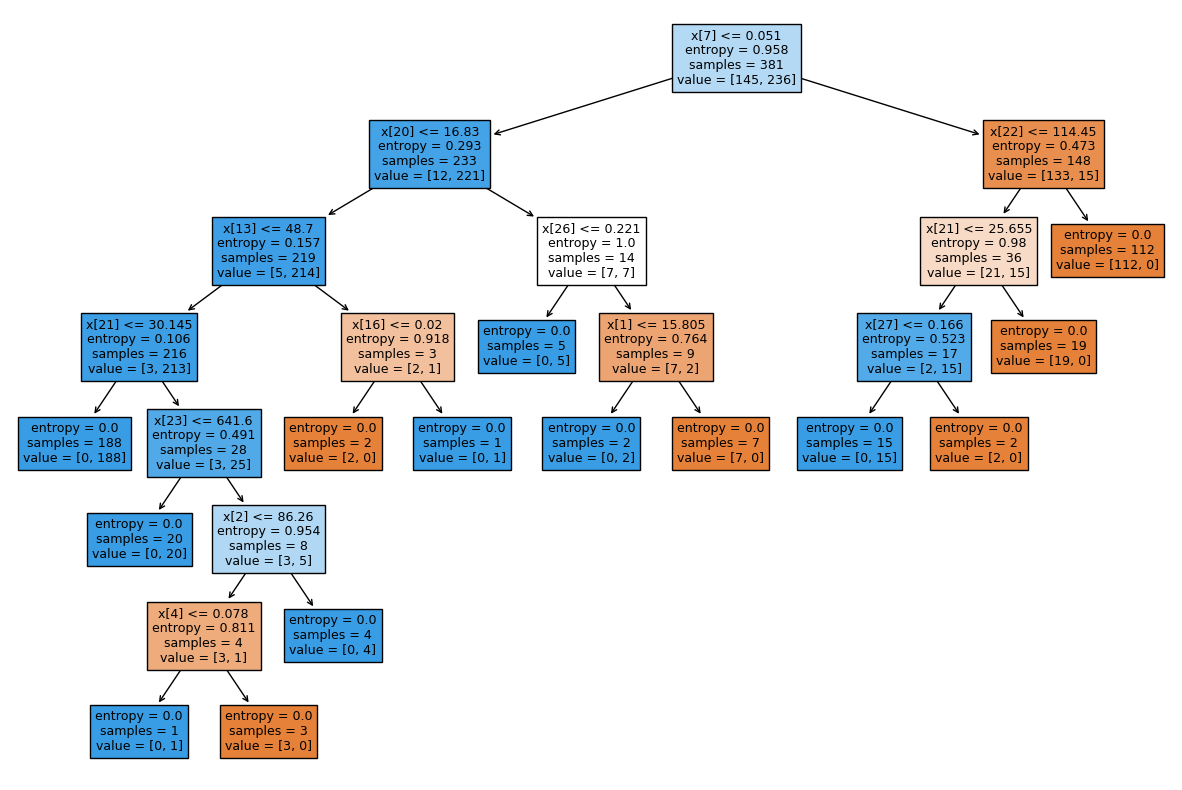

In [36]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(tree_classifier,filled=True)

In [37]:
#post pruning
tree_classifier = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [38]:
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5769230769230769, 0.875, 'x[7] <= 0.051\nentropy = 0.958\nsamples = 381\nvalue = [145, 236]'),
 Text(0.3076923076923077, 0.625, 'x[20] <= 16.83\nentropy = 0.293\nsamples = 233\nvalue = [12, 221]'),
 Text(0.15384615384615385, 0.375, 'x[13] <= 48.7\nentropy = 0.157\nsamples = 219\nvalue = [5, 214]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.106\nsamples = 216\nvalue = [3, 213]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.46153846153846156, 0.375, 'x[1] <= 16.19\nentropy = 1.0\nsamples = 14\nvalue = [7, 7]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.764\nsamples = 9\nvalue = [7, 2]'),
 Text(0.8461538461538461, 0.625, 'x[22] <= 114.45\nentropy = 0.473\nsamples = 148\nvalue = [133, 15]'),
 Text(0.7692307692307693, 0.375, 'x[21] <= 25.655\nentropy = 0.98\nsamples = 36\nvalue = [21, 15]'),
 Text(0.6923076923076923, 0.125, 'entropy = 0.523\nsample

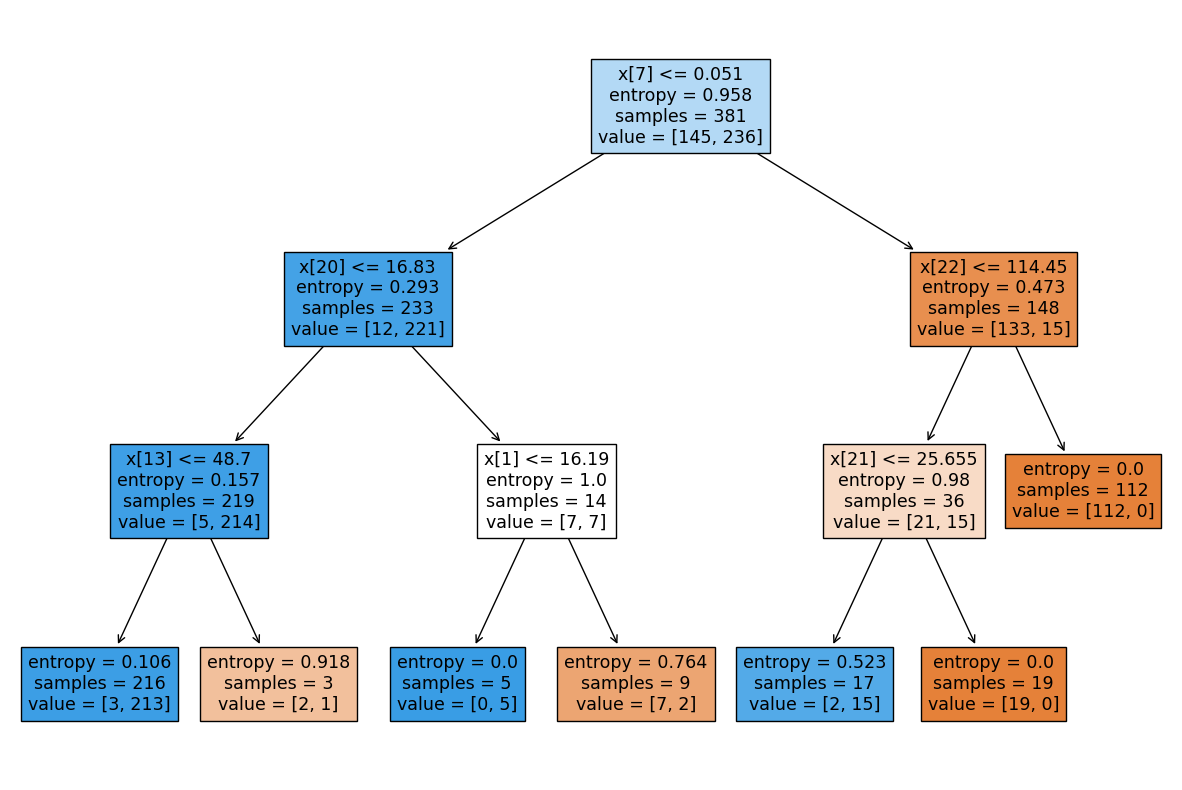

In [39]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(tree_classifier,filled=True)

In [40]:
y_pred = tree_classifier.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [42]:
confusion_matrix(y_test,y_pred)

array([[ 63,   4],
       [  1, 120]])

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        67
           1       0.97      0.99      0.98       121

    accuracy                           0.97       188
   macro avg       0.98      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



In [44]:
accuracy_score(y_test,y_pred)

0.973404255319149

## Decision tree prepruning

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
parameters = {
            'criterion' : ['gini','entropy','log_loss'],
            'splitter' : ['best','random'],
            'max_depth' : [1,2,3,4,5],
            'max_features' : ['auto','sqrt','log2']
             }

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
tree_classifier = DecisionTreeClassifier()

In [53]:
clf = GridSearchCV(tree_classifier,param_grid=parameters,cv = 5,scoring='accuracy')

In [54]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [55]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [57]:
y_pred = clf.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred)

0.9202127659574468

In [59]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        70
           1       0.93      0.95      0.94       118

    accuracy                           0.92       188
   macro avg       0.92      0.91      0.91       188
weighted avg       0.92      0.92      0.92       188

